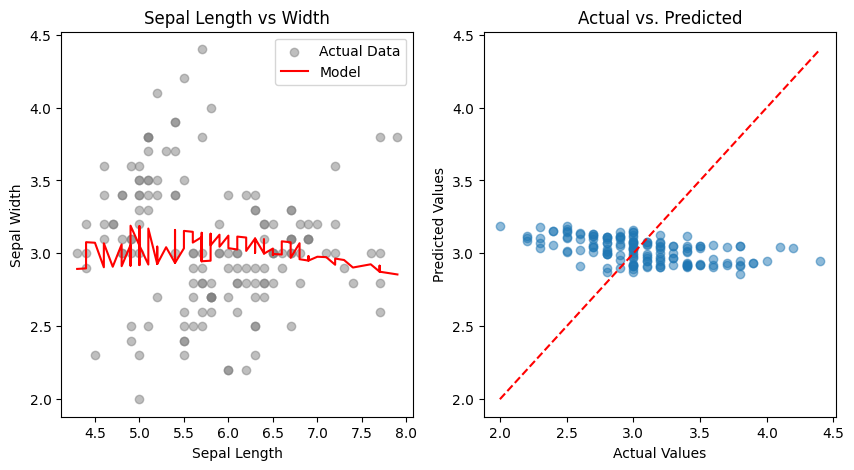

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold, cross_val_predict

# Prepare data
df = sns.load_dataset('iris')
X = df[['sepal_length']]
y = df['sepal_width']

# Model training and validation
my_pipeline = Pipeline([
    ("Scaler", StandardScaler()),
    ("Linear Model", Ridge())
])
cross_validator = KFold()
Y_predictions = cross_val_predict(my_pipeline, X, y, cv=cross_validator)

# Visual Plot
plt.figure(figsize=(10, 5)); plt.subplot(1, 2, 1)
plt.scatter(X, y, color='grey', alpha=0.5, label='Actual Data')
sort_axis = np.argsort(X.values.flatten())
plt.plot(X.values[sort_axis], Y_predictions[sort_axis], color='red', label='Model')
plt.title("Sepal Length vs Width"); plt.xlabel('Sepal Length'); plt.ylabel('Sepal Width')
plt.legend()

# Accuracy Plot
plt.subplot(1, 2, 2)
plt.scatter(y, Y_predictions, alpha=0.5)
y_min, y_max = y.min(), y.max()
plt.plot([y_min, y_max], [y_min, y_max], color='red', linestyle='--') 
plt.xlabel("Actual Values"); plt.ylabel("Predicted Values"); plt.title("Actual vs. Predicted")
plt.show()